# Assignment 3(1): C7
Description: Use your dataset to make VAR model. You need to consider endogenous/exogeneous, causation, impulse function, instrumental variables and others based upon Chapter 7.

# Covered Processes: 
## Correlation Heatmap, Pair Plots, ADF Test, AIC & BIC, VAR Model, Granger Causality, Impulse Test, Variance Decomposition 

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the stock symbols and date range
stocks = ['TCEHY', 'AAPL', 'NERD']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Display the first few rows of the data
print(log_returns.head())


[*********************100%%**********************]  3 of 3 completed
            AAPL_Log_Return  NERD_Log_Return  TCEHY_Log_Return
Date                                                          
2019-06-14              NaN              NaN               NaN
2019-06-21         0.030857         0.035285          0.083994
2019-06-28        -0.004336        -0.014604         -0.003749
2019-07-05         0.031384         0.010435          0.008580
2019-07-12        -0.004564        -0.011331         -0.005051


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the stock symbols and date range
stocks = ['TCEHY', 'AAPL', 'NERD']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()

# Display the first few rows of the data
print(log_returns.head())


[*********************100%%**********************]  3 of 3 completed
            AAPL_Log_Return  NERD_Log_Return  TCEHY_Log_Return
Date                                                          
2019-06-21         0.030857         0.035285          0.083994
2019-06-28        -0.004336        -0.014604         -0.003749
2019-07-05         0.031384         0.010435          0.008580
2019-07-12        -0.004564        -0.011331         -0.005051
2019-07-19        -0.003498        -0.022335          0.006802


In [4]:
from statsmodels.tsa.stattools import adfuller

# Function to perform the Dickey-Fuller test and print the results
def adf_test(series, column_name):
    result = adfuller(series)
    print(f"Results for {column_name}")
    print("Test Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"  {key}: {value}")
    print("Is the data stationary (at 5% significance level)?", result[1] <= 0.05)
    print("\n")

# Apply the Dickey-Fuller test to each column in log_returns
for column in log_returns.columns:
    adf_test(log_returns[column], column)


Results for AAPL_Log_Return
Test Statistic: -11.119928432402766
p-value: 3.486514977684138e-20
Critical Values:
  1%: -3.485585145896754
  5%: -2.885738566292665
  10%: -2.5796759080663887
Is the data stationary (at 5% significance level)? True


Results for NERD_Log_Return
Test Statistic: -9.79199062142212
p-value: 6.317596103761595e-17
Critical Values:
  1%: -3.485585145896754
  5%: -2.885738566292665
  10%: -2.5796759080663887
Is the data stationary (at 5% significance level)? True


Results for TCEHY_Log_Return
Test Statistic: -5.394318385094814
p-value: 3.481529037430563e-06
Critical Values:
  1%: -3.487517288664615
  5%: -2.8865777180380032
  10%: -2.5801239192052012
Is the data stationary (at 5% significance level)? True




[*********************100%%**********************]  3 of 3 completed


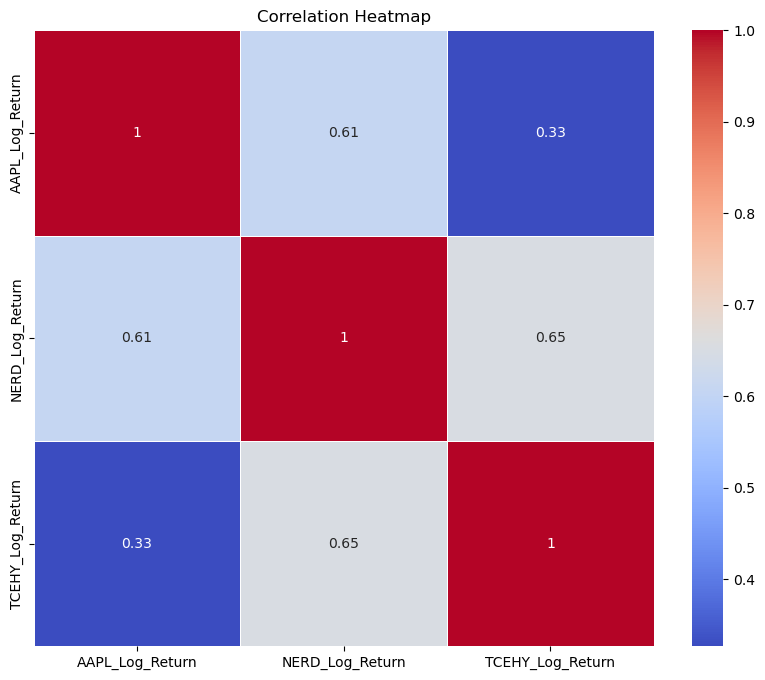

/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

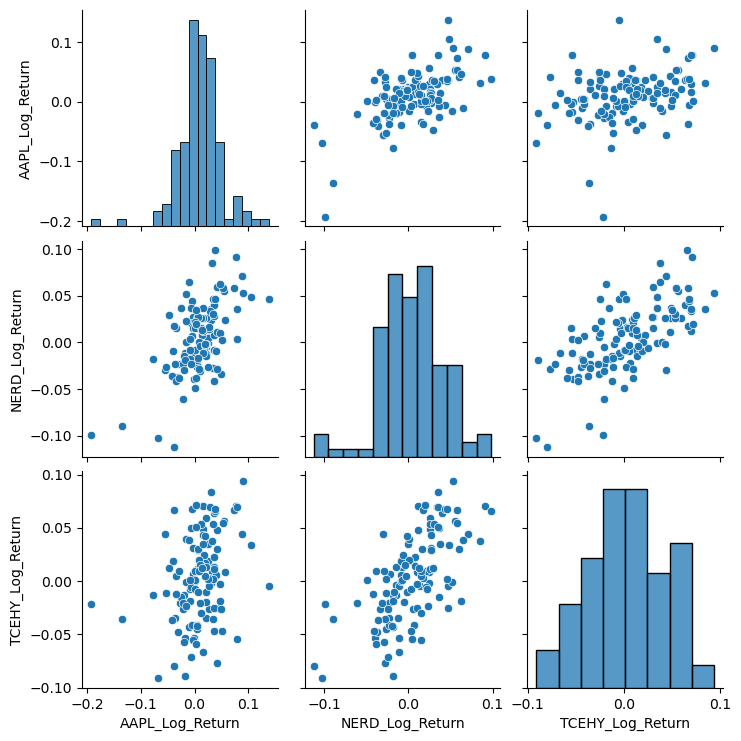

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Define the stock symbols and date range
stocks = ['TCEHY', 'AAPL', 'NERD']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()

# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Create a pair plot to visualize the relationships between all variables
sns.pairplot(log_returns)
plt.show()


[*********************100%%**********************]  3 of 3 completed


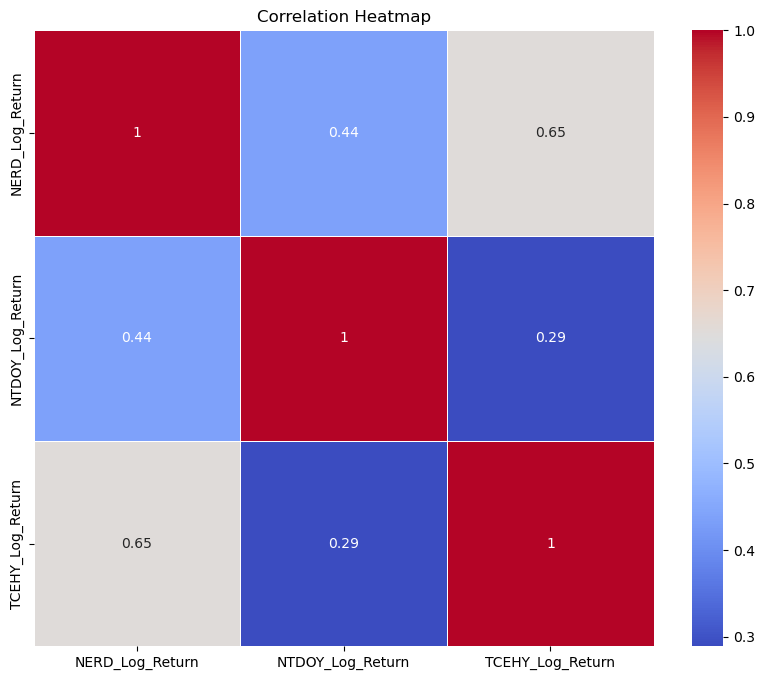

/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

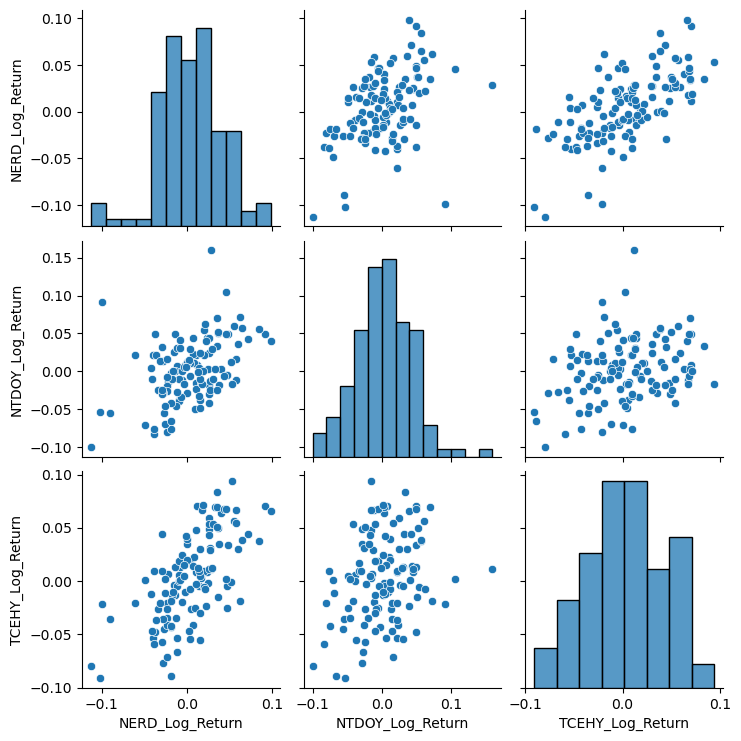

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

# Define the stock symbols and date range
stocks = ['NTDOY', 'NERD', 'TCEHY']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()

# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Create a pair plot to visualize the relationships between all variables
sns.pairplot(log_returns)
plt.show()


[*********************100%%**********************]  3 of 3 completed


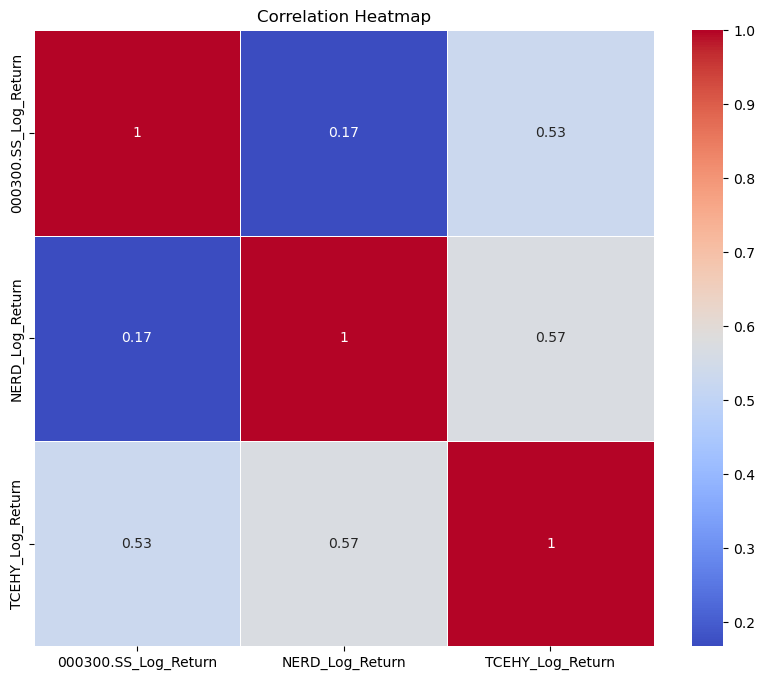

/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

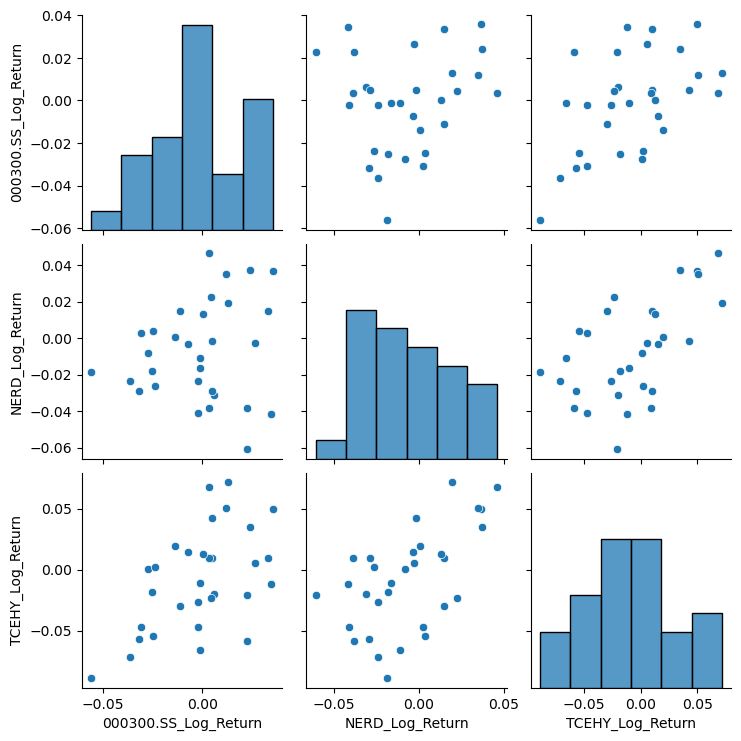

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

# Define the stock symbols and date range
stocks = ['000300.SS', 'NERD', 'TCEHY']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()

# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Create a pair plot to visualize the relationships between all variables
sns.pairplot(log_returns)
plt.show()


[*********************100%%**********************]  3 of 3 completed


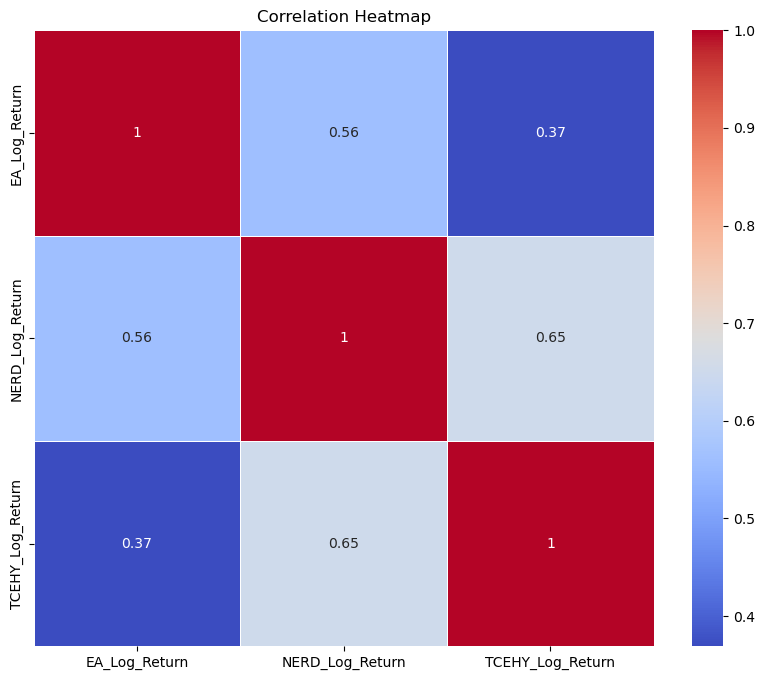

/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

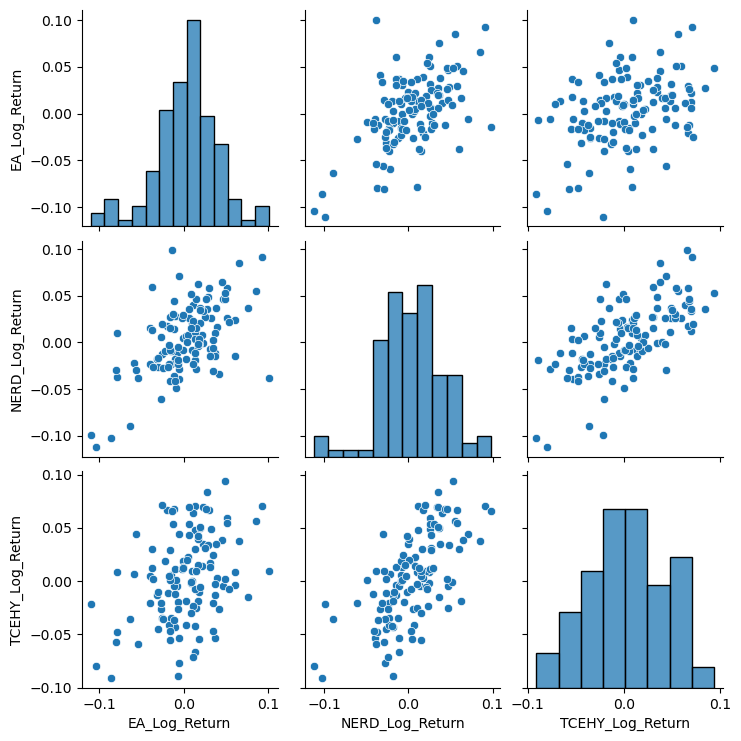

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

# Define the stock symbols and date range
stocks = ['EA', 'NERD', 'TCEHY']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()

# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Create a pair plot to visualize the relationships between all variables
sns.pairplot(log_returns)
plt.show()


[*********************100%%**********************]  3 of 3 completed


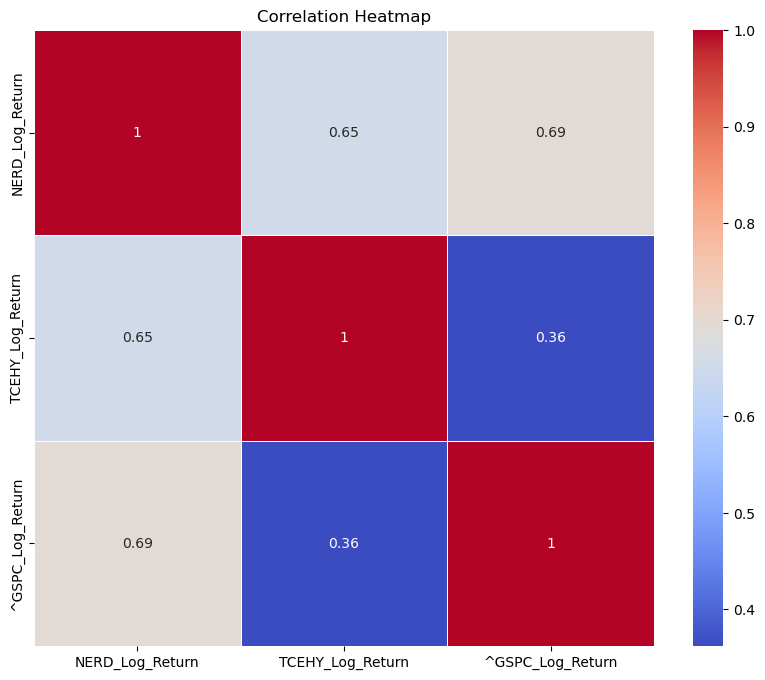

/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

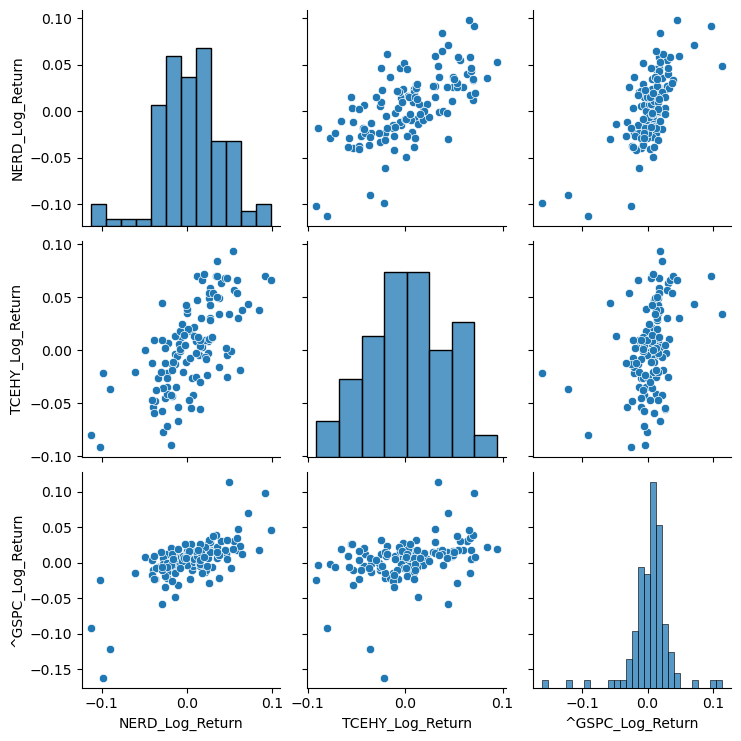

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

# Define the stock symbols and date range
stocks = ['^GSPC', 'NERD', 'TCEHY']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()

# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Create a pair plot to visualize the relationships between all variables
sns.pairplot(log_returns)
plt.show()


[*********************100%%**********************]  3 of 3 completed


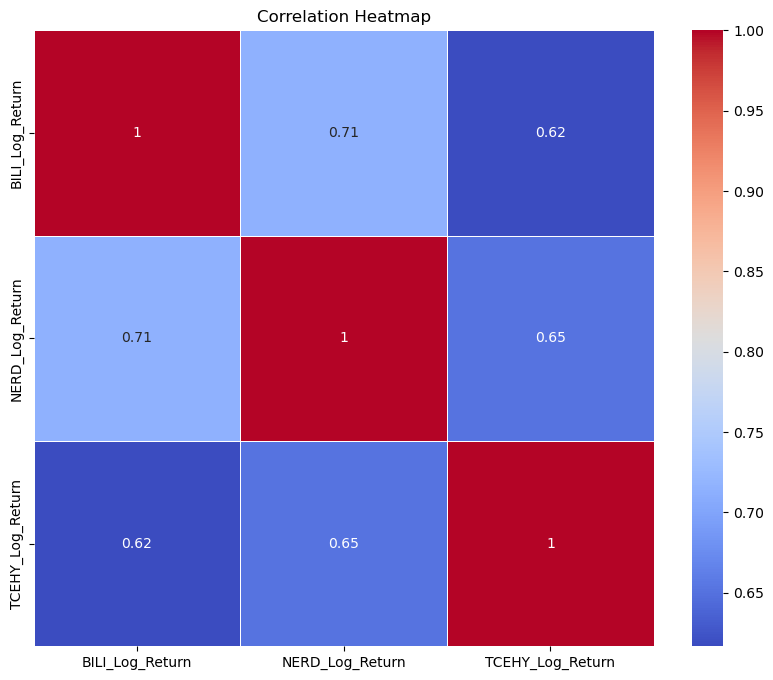

/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

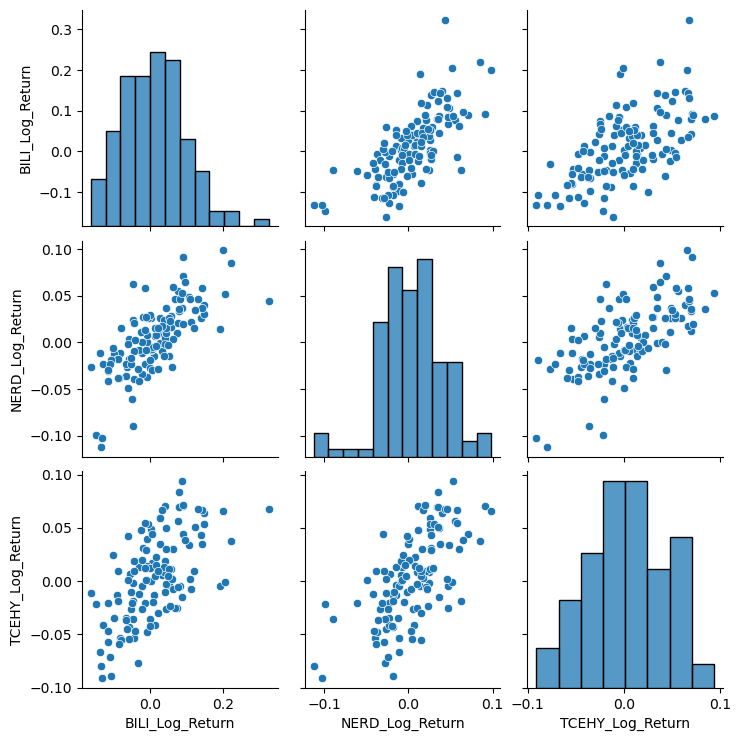

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

# Define the stock symbols and date range
stocks = ['BILI', 'NERD', 'TCEHY']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()

# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title ('Correlation Heatmap')
plt.show()

# Create a pair plot to visualize the relationships between all variables
sns.pairplot(log_returns)
plt.show()


In [13]:
from statsmodels.tsa.stattools import adfuller

# Define a function to perform the Dickey-Fuller test and print the results
def adf_test(series, column_name):
    result = adfuller(series)
    print(f"Results for {column_name}")
    print("Test Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"  {key}: {value}")
    print("Is the data stationary (at 5% significance level)?", result[1] <= 0.05)
    print("\n")

# Apply the Dickey-Fuller test to each column in log_returns
for column in log_returns.columns:
    adf_test(log_returns[column], column)


Results for BILI_Log_Return
Test Statistic: -9.938710903914528
p-value: 2.7000708955973745e-17
Critical Values:
  1%: -3.485585145896754
  5%: -2.885738566292665
  10%: -2.5796759080663887
Is the data stationary (at 5% significance level)? True


Results for NERD_Log_Return
Test Statistic: -9.79199043713747
p-value: 6.317602864262395e-17
Critical Values:
  1%: -3.485585145896754
  5%: -2.885738566292665
  10%: -2.5796759080663887
Is the data stationary (at 5% significance level)? True


Results for TCEHY_Log_Return
Test Statistic: -5.394317808718326
p-value: 3.4815387346163784e-06
Critical Values:
  1%: -3.487517288664615
  5%: -2.8865777180380032
  10%: -2.5801239192052012
Is the data stationary (at 5% significance level)? True




In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

# Define the stock symbols and date range
stocks = ['NERD', 'TCEHY', 'BILI']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()

# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

[*********************100%%**********************]  3 of 3 completed


In [50]:
from statsmodels.tsa.stattools import pacf_ols
import numpy as np
import pandas as pd

# Define the log return data
# Assuming you have a DataFrame log_returns with columns for each stock's log returns

# Maximum number of lags to consider
max_lags = 20

# Initialize lists to store AIC and BIC values
aic_values = []
bic_values = []

# Calculate AIC and BIC for different lag lengths for each column
for column in log_returns.columns:
    for lag in range(1, max_lags + 1):
        partial_acf = pacf_ols(log_returns[column], nlags=lag, efficient=False)
        
        # Calculate AIC and BIC based on partial autocorrelation values
        aic = -2 * np.log(partial_acf).sum()
        bic = -2 * np.log(partial_acf).sum() + (lag + 1) * np.log(len(log_returns))
        
        aic_values.append(aic)
        bic_values.append(bic)

# Find the lag length that minimizes AIC and BIC
optimal_lag_aic = np.argmin(aic_values) + 1  # Adding 1 to convert to 1-based index
optimal_lag_bic = np.argmin(bic_values) + 1

print("Optimal Lag (AIC):", optimal_lag_aic)
print("Optimal Lag (BIC):", optimal_lag_bic)

Optimal Lag (AIC): 2
Optimal Lag (BIC): 2


/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_18063/2628702592.py:21: RuntimeWarning: invalid value encountered in log
  aic = -2 * np.log(partial_acf).sum()
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_18063/2628702592.py:22: RuntimeWarning: invalid value encountered in log
  bic = -2 * np.log(partial_acf).sum() + (lag + 1) * np.log(len(log_returns))


[ 1.          0.09566503 -0.02409689]
[1.         0.1111358  0.00139581]
[ 1.          0.15686586 -0.08886026]


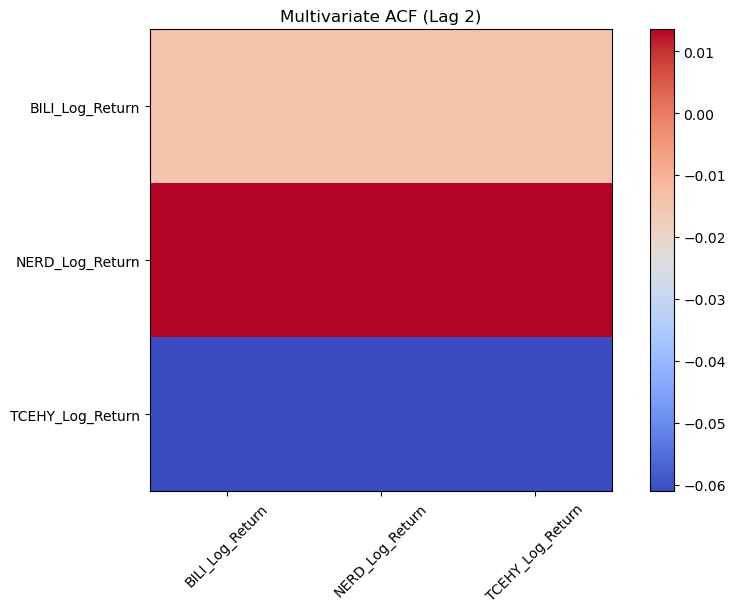

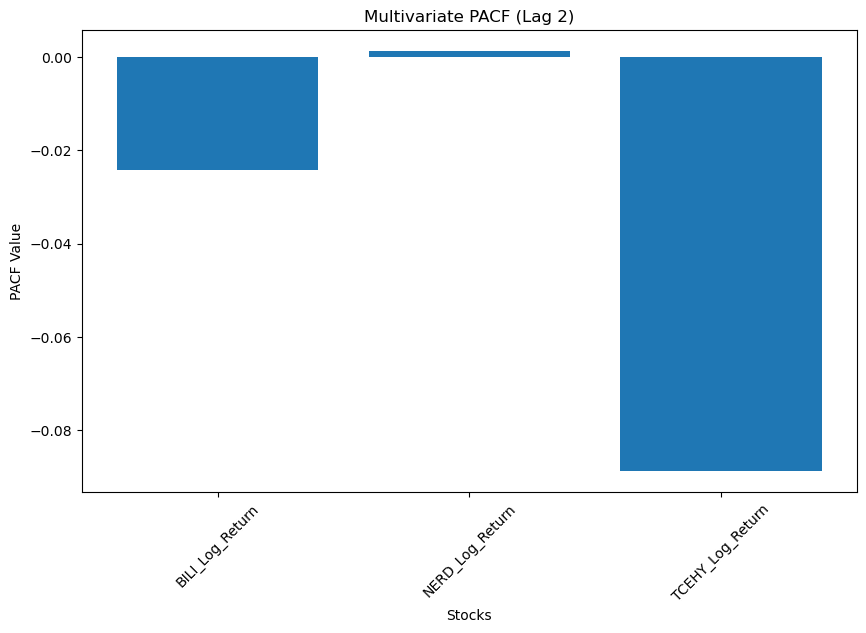

In [51]:
from statsmodels.tsa.stattools import pacf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the log return data
# Assuming you have a DataFrame log_returns with columns for each stock's log returns

# Calculate multivariate ACF for lag 2
lag = 2
multivariate_acf = np.zeros((len(log_returns.columns), len(log_returns.columns)))
for i in range(len(log_returns.columns)):
    for j in range(len(log_returns.columns)):
        multivariate_acf[i, j] = acf(log_returns[log_returns.columns[i]], nlags=lag)[lag]

# Calculate multivariate PACF for lag 2 for each stock
multivariate_pacf = []
for column in log_returns.columns:
    pacf_values = pacf(log_returns[column], nlags=lag)
    multivariate_pacf.append(pacf_values[lag])
    print(pacf_values)

# Plot multivariate ACF
plt.figure(figsize=(10, 6))
plt.imshow(multivariate_acf, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Multivariate ACF (Lag 2)')
plt.xticks(range(len(log_returns.columns)), log_returns.columns, rotation=45)
plt.yticks(range(len(log_returns.columns)), log_returns.columns)
plt.show()

# Plot multivariate PACF
plt.figure(figsize=(10, 6))
plt.bar(log_returns.columns, multivariate_pacf)
plt.title('Multivariate PACF (Lag 2)')
plt.xlabel('Stocks')
plt.ylabel('PACF Value')
plt.xticks(rotation=45)
plt.show()


In [52]:
from statsmodels.tsa.stattools import grangercausalitytests

# Set a range of lag orders to explore
lag_orders = [1, 2, 3, 4, 5]

# Significance level
alpha = 0.05

# Perform the Granger causality test for different lag orders for all pairs of stocks
for effect in log_returns.columns:
    for cause in log_returns.columns:
        if effect != cause:
            print(f"Granger causality from {cause} to {effect}:")

            data = pd.DataFrame({
                'Effect': log_returns[effect],
                'Cause': log_returns[cause]
            })

            for lag in lag_orders:
                results = grangercausalitytests(data, lag, verbose=False)
                p_value = results[lag][0]['ssr_ftest'][1]

                if p_value < alpha:
                    print(f'  Lag {lag}: p-value = {p_value} (Reject H0: Granger causality)')
                else:
                    print(f'  Lag {lag}: p-value = {p_value} (Fail to reject H0)')


Granger causality from NERD_Log_Return to BILI_Log_Return:
  Lag 1: p-value = 0.855165366721083 (Fail to reject H0)
  Lag 2: p-value = 0.6602675397975997 (Fail to reject H0)
  Lag 3: p-value = 0.23482978248775563 (Fail to reject H0)
  Lag 4: p-value = 0.09671611083710435 (Fail to reject H0)
  Lag 5: p-value = 0.1893305163600526 (Fail to reject H0)
Granger causality from TCEHY_Log_Return to BILI_Log_Return:
  Lag 1: p-value = 0.23975726065272304 (Fail to reject H0)
  Lag 2: p-value = 0.23813547970812227 (Fail to reject H0)
  Lag 3: p-value = 0.12084780309569705 (Fail to reject H0)
  Lag 4: p-value = 0.13982685861206282 (Fail to reject H0)
  Lag 5: p-value = 0.14307644131517153 (Fail to reject H0)
Granger causality from BILI_Log_Return to NERD_Log_Return:
  Lag 1: p-value = 0.2797816049533244 (Fail to reject H0)
  Lag 2: p-value = 0.38705041454690325 (Fail to reject H0)
  Lag 3: p-value = 0.04208363905465586 (Reject H0: Granger causality)
  Lag 4: p-value = 0.016941185374842536 (Reject H

In [53]:
import statsmodels.api as sm

# Define the lag order for the VAR model
lag_order = 2  # You can choose a suitable lag order

# Create a VAR model
model = sm.tsa.VAR(log_returns)

# Fit the VAR model with the chosen lag order
results = model.fit(lag_order)

# Print a summary of the VAR model
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 25, Oct, 2023
Time:                     17:14:46
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.5909
Nobs:                     120.000    HQIC:                  -18.8806
Log likelihood:           654.905    FPE:                5.18073e-09
AIC:                     -19.0787    Det(Omega_mle):     4.37042e-09
--------------------------------------------------------------------
Results for equation BILI_Log_Return
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.010801         0.007977            1.354           0.176
L1.BILI_Log_Return          0.017054         0.136437            0.125           0.901
L1.NERD_Log_Return        

In [22]:
import statsmodels.api as sm

# Define the lag order for the VAR model
lag_order = 1  # You can choose a suitable lag order

# Create a VAR model
model = sm.tsa.VAR(log_returns)

# Fit the VAR model with the chosen lag order
results = model.fit(lag_order)

# Print a summary of the VAR model
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 24, Oct, 2023
Time:                     22:18:41
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.9003
Nobs:                     121.000    HQIC:                  -19.0650
Log likelihood:           657.171    FPE:                4.69135e-09
AIC:                     -19.1776    Det(Omega_mle):     4.25524e-09
--------------------------------------------------------------------
Results for equation BILI_Log_Return
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.011421         0.007884            1.449           0.147
L1.BILI_Log_Return          0.031294         0.136374            0.229           0.819
L1.NERD_Log_Return        

In [23]:
import statsmodels.api as sm

# Define the lag order for the VAR model
lag_order = 4  # You can choose a suitable lag order

# Create a VAR model
model = sm.tsa.VAR(log_returns)

# Fit the VAR model with the chosen lag order
results = model.fit(lag_order)

# Print a summary of the VAR model
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 24, Oct, 2023
Time:                     22:19:08
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -17.9864
Nobs:                     118.000    HQIC:                  -18.5304
Log likelihood:           651.924    FPE:                6.19527e-09
AIC:                     -18.9022    Det(Omega_mle):     4.52785e-09
--------------------------------------------------------------------
Results for equation BILI_Log_Return
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.009404         0.008215            1.145           0.252
L1.BILI_Log_Return          0.015041         0.138104            0.109           0.913
L1.NERD_Log_Return        

In [24]:
import statsmodels.api as sm

# Define the lag order for the VAR model
lag_order = 3  # You can choose a suitable lag order

# Create a VAR model
model = sm.tsa.VAR(log_returns)

# Fit the VAR model with the chosen lag order
results = model.fit(lag_order)

# Print a summary of the VAR model
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 24, Oct, 2023
Time:                     22:32:23
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.3006
Nobs:                     119.000    HQIC:                  -18.7168
Log likelihood:           654.014    FPE:                5.60242e-09
AIC:                     -19.0013    Det(Omega_mle):     4.39792e-09
--------------------------------------------------------------------
Results for equation BILI_Log_Return
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.010872         0.008101            1.342           0.180
L1.BILI_Log_Return          0.015867         0.138503            0.115           0.909
L1.NERD_Log_Return        

In [25]:
# Assuming 'log_returns' is your DataFrame
standard_deviations = log_returns.std()

# This will compute the standard deviation for each column (variable) in the DataFrame


In [26]:
print(standard_deviations)


BILI_Log_Return     0.085363
NERD_Log_Return     0.036916
TCEHY_Log_Return    0.040838
dtype: float64


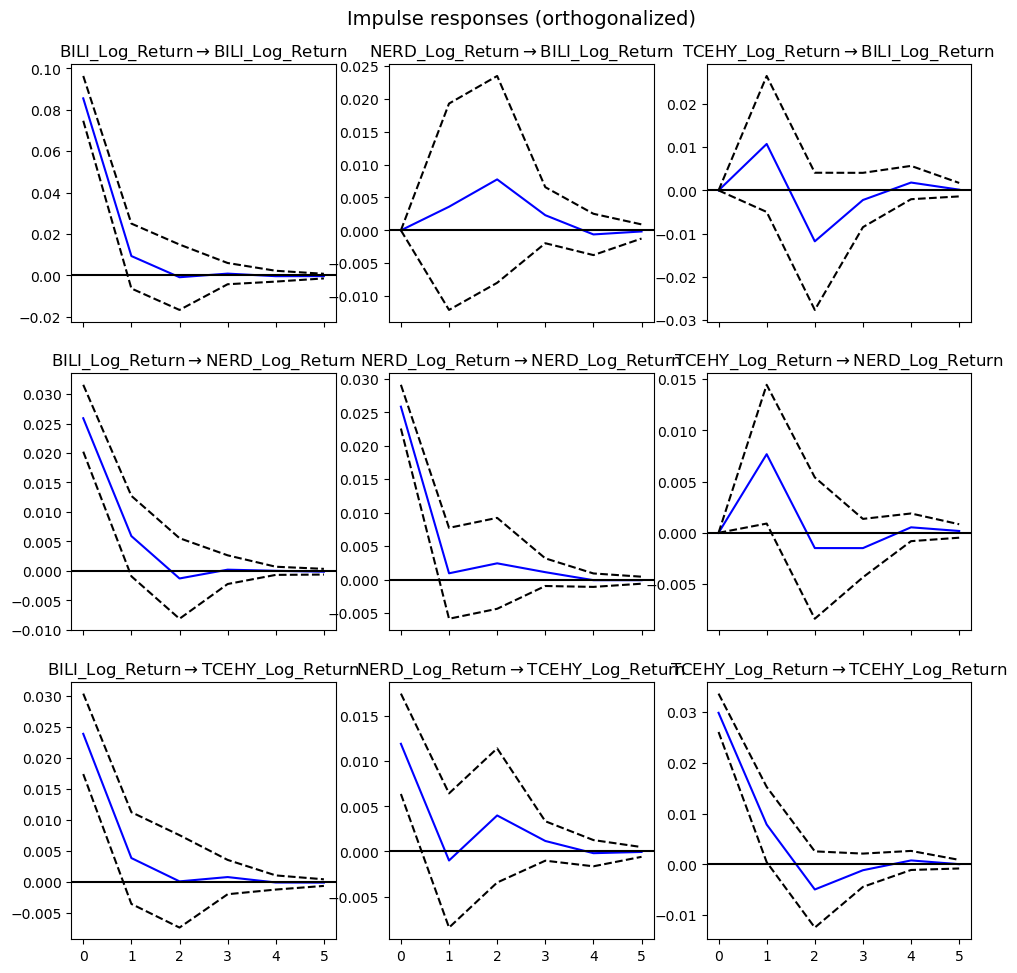

In [28]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# Assuming you have already prepared the 'log_returns' DataFrame

# Fit a VAR model
model = VAR(log_returns)
results = model.fit(2)  # You can specify the lag order (e.g., 2) based on your analysis

# Perform impulse response analysis and plot the impulse response functions
irf = results.irf(5)  # You can specify the number of periods (e.g., 10)
irf.plot(orth=True)  # 'orth=True' for orthogonalized IRFs
plt.show()


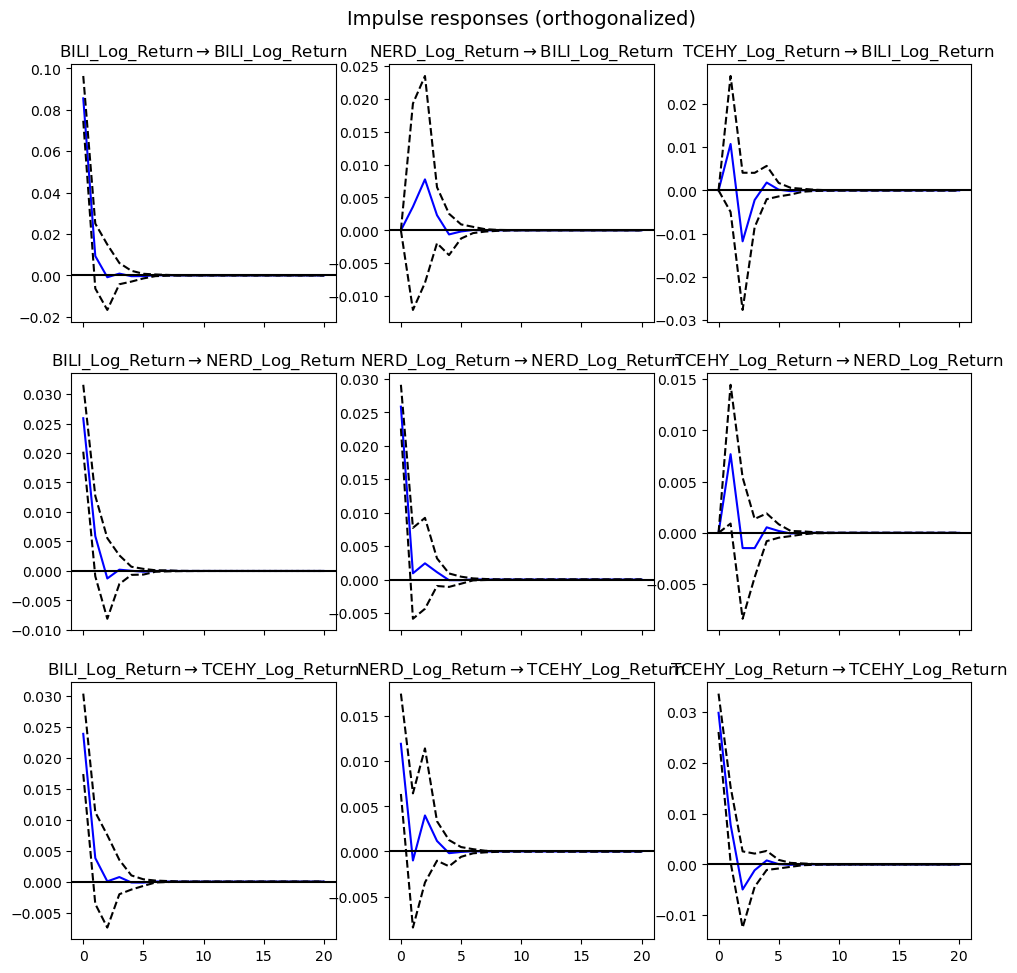

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# Assuming you have already prepared the 'log_returns' DataFrame

# Fit a VAR model
model = VAR(log_returns)
results = model.fit(2)  # You can specify the lag order (e.g., 2) based on your analysis

# Perform impulse response analysis and plot the impulse response functions
irf = results.irf(20)  # You can specify the number of periods (e.g., 10)
irf.plot(orth=True)  # 'orth=True' for orthogonalized IRFs
plt.show()

[*********************100%%**********************]  3 of 3 completed


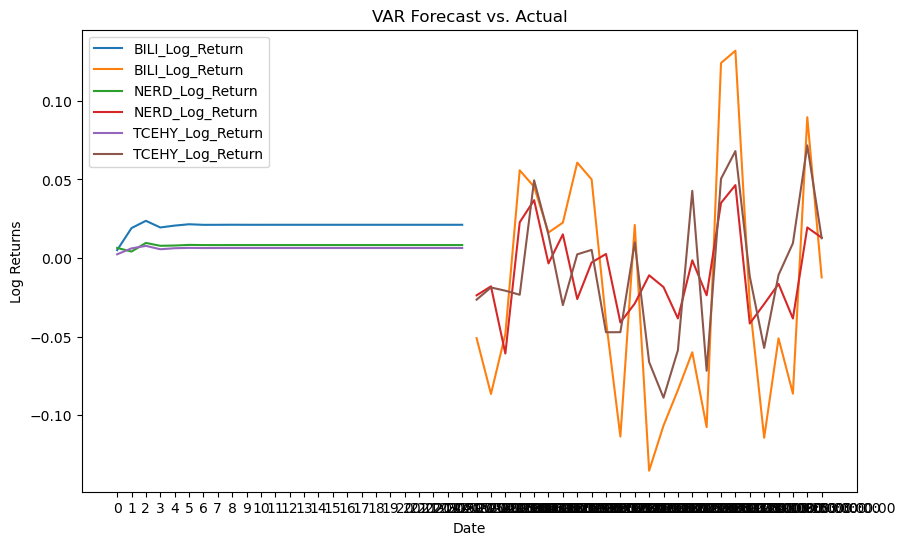

                     BILI_Log_Return  NERD_Log_Return  TCEHY_Log_Return  \
0                           0.005001         0.006425          0.002358   
1                           0.019039         0.004093          0.006115   
2                           0.023655         0.009593          0.007716   
3                           0.019425         0.007761          0.005571   
4                           0.020613         0.007938          0.006217   
5                           0.021472         0.008329          0.006436   
6                           0.021105         0.008225          0.006323   
7                           0.021118         0.008206          0.006352   
8                           0.021164         0.008231          0.006367   
9                           0.021134         0.008223          0.006355   
10                          0.021134         0.008221          0.006355   
11                          0.021139         0.008223          0.006357   
12                       

In [31]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.api import VAR

# Define the stock symbols and date range
stocks = ['BILI', 'NERD', 'TCEHY']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()

# Split the data into training (80%) and testing (20%) sets
train_size = int(0.8 * len(log_returns))
train_data, test_data = log_returns[:train_size], log_returns[train_size:]

# Fit a VAR model using the training data
model = VAR(train_data)
lag_order = 2  # Choose the lag order based on previous analysis
results = model.fit(lag_order)

# Forecast future values using the VAR model
forecasted_data = results.forecast(train_data.values[-lag_order:], len(test_data))

# Create a DataFrame with forecasted and actual values
forecasted_df = pd.DataFrame(forecasted_data, columns=log_returns.columns)
actual_df = test_data

# Concatenate forecasted and actual data for comparison
result_df = pd.concat([forecasted_df, actual_df], axis=1)

# Plot the forecasted and actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for column in log_returns.columns:
    plt.plot(result_df.index.astype(str), result_df[column], label=column)
plt.legend()
plt.title('VAR Forecast vs. Actual')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.show()

# Display the table of results
print(result_df)


In [35]:
results.mse(20)

array([[[0.00730548, 0.00226339, 0.00178612],
        [0.00226339, 0.00144168, 0.00094549],
        [0.00178612, 0.00094549, 0.00149229]],

       [[0.00750383, 0.00240686, 0.00190411],
        [0.00240686, 0.00155045, 0.00103795],
        [0.00190411, 0.00103795, 0.00159073]],

       [[0.00785752, 0.00248692, 0.00200794],
        [0.00248692, 0.00157194, 0.0010609 ],
        [0.00200794, 0.0010609 , 0.00162588]],

       [[0.00788252, 0.00249864, 0.00201761],
        [0.00249864, 0.00157758, 0.00106545],
        [0.00201761, 0.00106545, 0.00163027]],

       [[0.00788847, 0.0025005 , 0.00201884],
        [0.0025005 , 0.0015783 , 0.00106583],
        [0.00201884, 0.00106583, 0.00163059]],

       [[0.007889  , 0.00250069, 0.00201902],
        [0.00250069, 0.00157837, 0.00106589],
        [0.00201902, 0.00106589, 0.0016307 ]],

       [[0.00788904, 0.0025007 , 0.00201903],
        [0.0025007 , 0.00157838, 0.00106589],
        [0.00201903, 0.00106589, 0.00163071]],

       [[0.00788909,

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

# Define the stock symbols and date range
stocks = ['NERD', 'TCEHY', 'BILI']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()


[*********************100%%**********************]  3 of 3 completed


In [40]:
# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

In [42]:
import statsmodels.tsa.api as smt


In [43]:
model = smt.VAR(data)
res = model.fit(maxlags=2) 
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 25, Oct, 2023
Time:                     17:08:40
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -13.2752
Nobs:                     120.000    HQIC:                  -13.4132
Log likelihood:           479.905    FPE:                1.36084e-06
AIC:                     -13.5075    Det(Omega_mle):     1.25415e-06
--------------------------------------------------------------------
Results for equation Effect
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.002365         0.003676            0.643           0.520
L1.Effect         0.273636         0.119099            2.298           0.022
L1.Cause         -0.136827         0.131191           -1.043           0.29

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

# Define the stock symbols and date range
stocks = ['Bili', 'TCEHY', 'NERD']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()

[*********************100%%**********************]  3 of 3 completed


In [56]:
model = VAR(log_returns)
lag_order = 2  # Choose the lag order based on previous analysis
results = model.fit(lag_order)

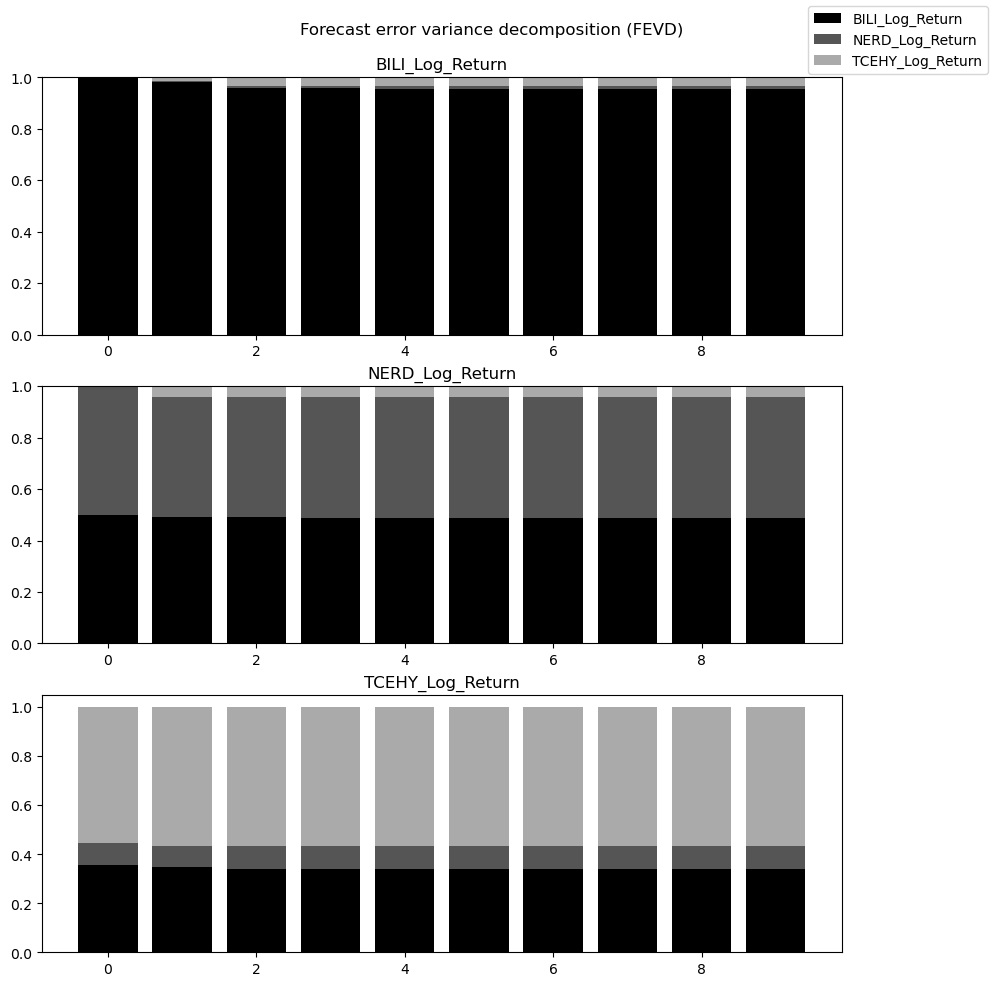

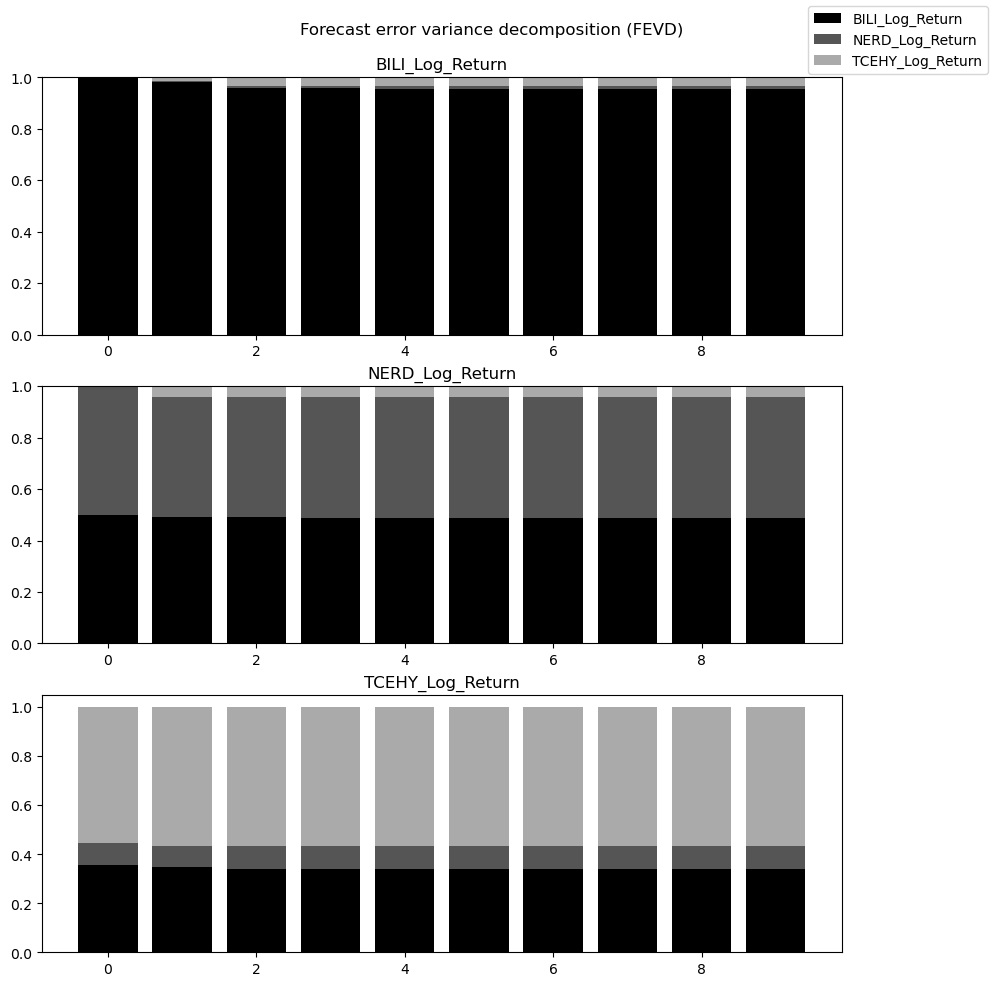

In [57]:
results.fevd().plot()